<a href="https://colab.research.google.com/github/MakeThaClap/EstadisticaVerano/blob/main/Gym_Members_Exercise_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/MakeThaClap/EstadisticaVerano/refs/heads/main/gym_members_exercise_tracking.csv')
df


,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration,Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,24,Male,87.1,1.74,187,158,67,1.57,1364.0,Strength,10.0,3.5,4,3,28.77
969,25,Male,66.6,1.61,184,166,56,1.38,1260.0,Strength,25.0,3.0,2,1,25.69
970,59,Female,60.4,1.76,194,120,53,1.72,929.0,Cardio,18.8,2.7,5,3,19.50
971,32,Male,126.4,1.83,198,146,62,1.10,883.0,HIIT,28.2,2.1,3,2,37.74


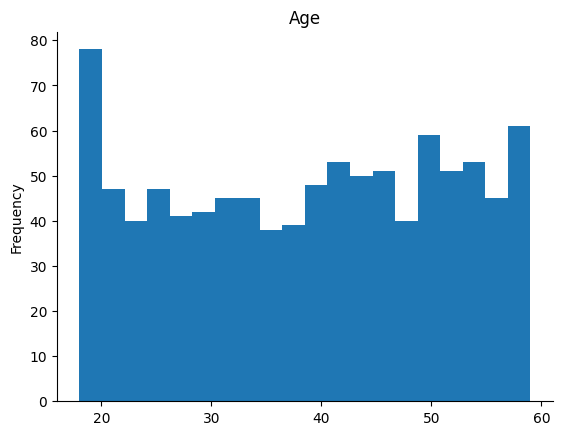

In [41]:
# @title Age

from matplotlib import pyplot as plt
df['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [42]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
modelo_lineal=ols(" Calories_Burned ~ C(Gender)", data=df).fit()
tabla_anova=sm.stats.anova_lm(modelo_lineal)
if valor_p_psh<0.05:
  print("Ho: No hay relacion entre X y Y")
else:
  print("H1: Si hay relacion entre X y Y")
tabla_anova

Ho: No hay relacion entre X y Y


,df,sum_sq,mean_sq,F,PR(>F)
C(Gender),1.0,1.639714e+06,1.639714e+06,22.547934,0.000002
Residual,971.0,7.061235e+07,7.272126e+04,NaN,NaN


In [43]:
df ["Gender"].unique()

array(['Male', 'Female'], dtype=object)

In [44]:
from scipy.stats import shapiro
_, valor_p_psh = shapiro(modelo_lineal.resid)
print("valor-p shapiro=", valor_p_psh)
if valor_p_psh<0.05:
  print("Los datos no siguen una distribucion normal")
else:
  print("Los datos siguen una distribucion normal \n")

valor-p shapiro= 0.00019903313691842486
Los datos no siguen una distribucion normal


In [45]:
from scipy.stats import levene
grupo1 = df[df['Gender'] == 'Male']['Calories_Burned']
grupo2 = df[df['Gender'] == 'Female']['Calories_Burned']

stat, p = levene(grupo1, grupo2)
print(f"p-valor de Levene: {p}")
if p < 0.05:
    print("Hay heterosedasticidad o Las varianzas no son iguales")
else:
    print("Hay homosedasticidad o Las varianzas son iguales")


p-valor de Levene: 0.0021906699819997854
Hay heterosedasticidad o Las varianzas no son iguales


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
Female   Male  82.2071   0.0 48.2331 116.181   True
---------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

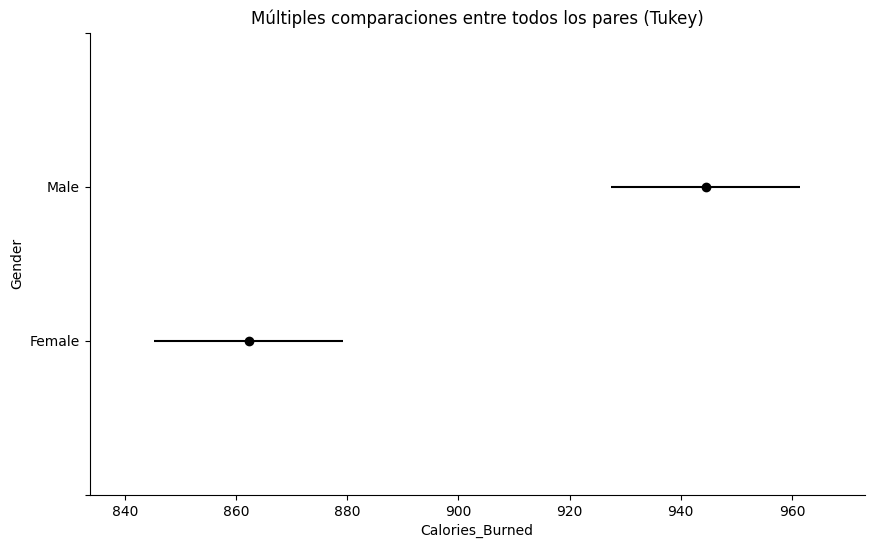

In [46]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['Calories_Burned'], groups=df['Gender'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Gender", xlabel="Calories_Burned")
plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")
#Test de Tukey\
# Es mejor cocerlos con Sal o T3



In [47]:
df["Gender"]=df["Gender"].map ({"Male":2, "Female":1})
df

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration,Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,2,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,1,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,1,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,2,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,2,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,24,2,87.1,1.74,187,158,67,1.57,1364.0,Strength,10.0,3.5,4,3,28.77
969,25,2,66.6,1.61,184,166,56,1.38,1260.0,Strength,25.0,3.0,2,1,25.69
970,59,1,60.4,1.76,194,120,53,1.72,929.0,Cardio,18.8,2.7,5,3,19.50
971,32,2,126.4,1.83,198,146,62,1.10,883.0,HIIT,28.2,2.1,3,2,37.74


In [48]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
modelo_lineal=ols(" Calories_Burned ~ C(Workout_Type)", data=df).fit()
tabla_anova=sm.stats.anova_lm(modelo_lineal)
if valor_p_psh<0.05:
  print("Ho: No hay diferencia entre X y Y")
else:
  print("H1: Si hay diferencia entre X y Y")
tabla_anova

Ho: No hay diferencia entre X y Y


,df,sum_sq,mean_sq,F,PR(>F)
C(Workout_Type),3.0,2.116701e+05,70556.703442,0.949043,0.41624
Residual,969.0,7.204039e+07,74345.089042,NaN,NaN


valor-p (Shapiro) = 2.4291767943152403e-05


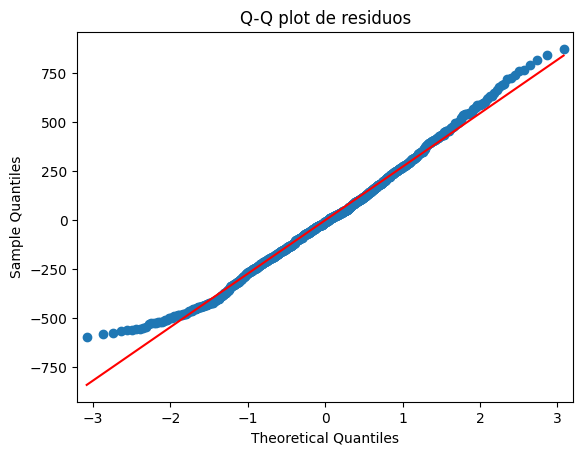

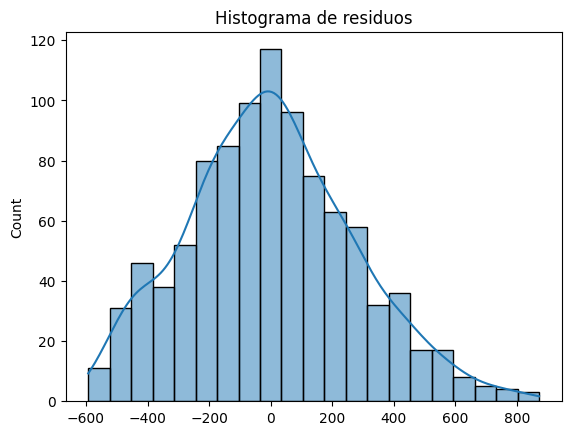

In [49]:
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import seaborn as sns

residuos = modelo_lineal.resid

# Prueba de Shapiro-Wilk
stat, valor_p_sh = shapiro(residuos)
print(f"valor-p (Shapiro) = {valor_p_sh}")

# Visualización: Q-Q plot
sm.qqplot(residuos, line='s')
plt.title("Q-Q plot de residuos")
plt.show()

# Histograma
sns.histplot(residuos, kde=True)
plt.title("Histograma de residuos")
plt.show()

In [50]:
from scipy.stats import levene
grupo1 = df[df['Workout_Type'] == 'Yoga']['Calories_Burned']
grupo2 = df[df['Workout_Type'] == 'HIIT']['Calories_Burned']
grupo3 = df[df['Workout_Type'] == 'Cardio']['Calories_Burned']
grupo4 = df[df['Workout_Type'] == 'Strength']['Calories_Burned']



stat, p = levene(grupo1, grupo2, grupo3, grupo4)
print(f"p-valor de Levene: {p}")
if p < 0.05:
    print("Hay heterosedasticidad o Las varianzas no son iguales")
else:
    print("Hay homosedasticidad o Las varianzas son iguales")


p-valor de Levene: 0.788993613463197
Hay homosedasticidad o Las varianzas son iguales


   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
 group1   group2  meandiff p-adj   lower    upper   reject
----------------------------------------------------------
  Cardio     HIIT  41.2917 0.3523 -23.1974 105.7809  False
  Cardio Strength  26.1839 0.6973 -35.7784  88.1463  False
  Cardio     Yoga  18.6746 0.8721 -44.5002  81.8494  False
    HIIT Strength -15.1078 0.9306 -79.4226  49.2071  False
    HIIT     Yoga -22.6171 0.8107 -88.1009  42.8666  False
Strength     Yoga  -7.5094   0.99 -70.5062  55.4875  False
----------------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

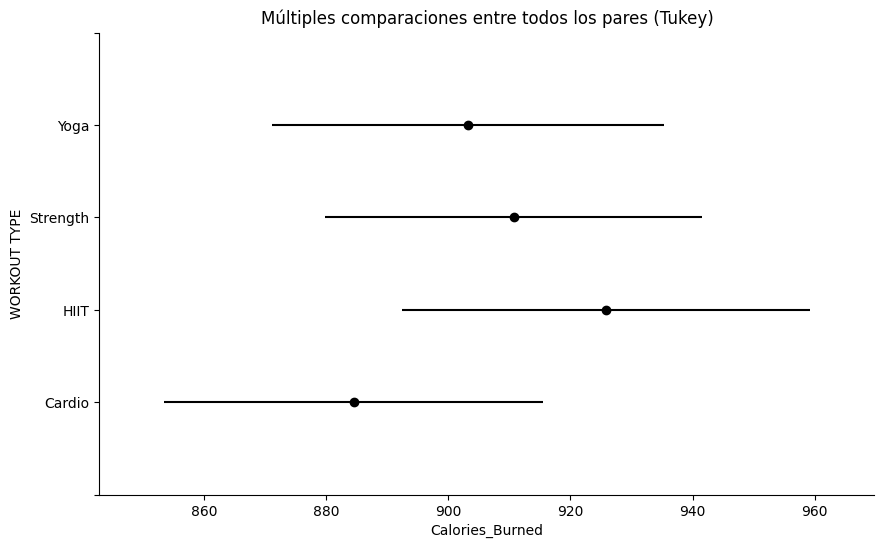

In [51]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['Calories_Burned'], groups=df['Workout_Type'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="WORKOUT TYPE", xlabel="Calories_Burned")
plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")
#Test de Tukey\
# Es mejor cocerlos con Sal o T3



In [52]:
df = df.drop(columns=['Workout_Type'])
df

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration,Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,2,88.3,1.71,180,157,60,1.69,1313.0,12.6,3.5,4,3,30.20
1,46,1,74.9,1.53,179,151,66,1.30,883.0,33.9,2.1,4,2,32.00
2,32,1,68.1,1.66,167,122,54,1.11,677.0,33.4,2.3,4,2,24.71
3,25,2,53.2,1.70,190,164,56,0.59,532.0,28.8,2.1,3,1,18.41
4,38,2,46.1,1.79,188,158,68,0.64,556.0,29.2,2.8,3,1,14.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,24,2,87.1,1.74,187,158,67,1.57,1364.0,10.0,3.5,4,3,28.77
969,25,2,66.6,1.61,184,166,56,1.38,1260.0,25.0,3.0,2,1,25.69
970,59,1,60.4,1.76,194,120,53,1.72,929.0,18.8,2.7,5,3,19.50
971,32,2,126.4,1.83,198,146,62,1.10,883.0,28.2,2.1,3,2,37.74


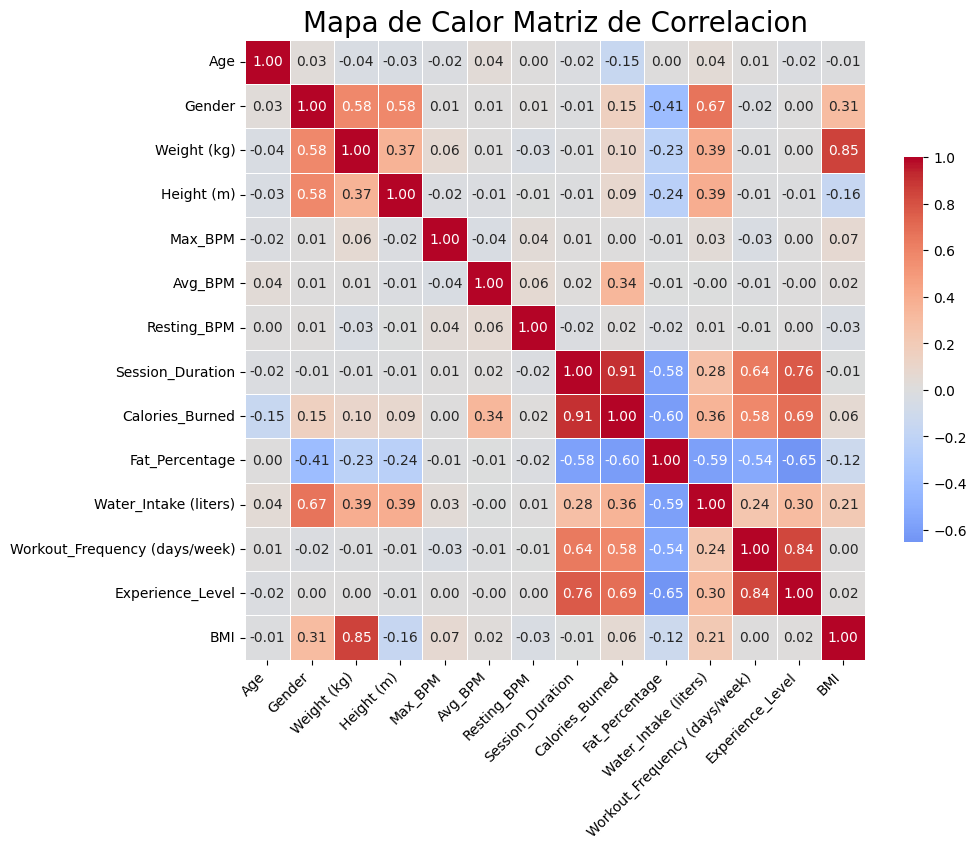

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt
matriz_de_correlacion=df.corr()
plt.figure(figsize=(10,10),dpi=100)
sns.heatmap(matriz_de_correlacion, #lo que va a grafica
    annot=True,#se muestran los valores en las celdas
    fmt="0.2f", #0.2f significa 2 decimales
    cmap="coolwarm", #paleta de colroes
    square=True,#forzar cuadrado
    linewidths=0.5,#grosor de lineas
    cbar_kws={"shrink":0.5}, #tama;o de barra lateral
    center=0, #linea vertical central
)
plt.title("Mapa de Calor Matriz de Correlacion",fontsize=20)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.show()


     Age  Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
0     56       2         88.3        1.71      180      157           60   
1     46       1         74.9        1.53      179      151           66   
2     32       1         68.1        1.66      167      122           54   
3     25       2         53.2        1.70      190      164           56   
4     38       2         46.1        1.79      188      158           68   
..   ...     ...          ...         ...      ...      ...          ...   
968   24       2         87.1        1.74      187      158           67   
969   25       2         66.6        1.61      184      166           56   
970   59       1         60.4        1.76      194      120           53   
971   32       2        126.4        1.83      198      146           62   
972   46       2         88.7        1.63      166      146           66   

     Session_Duration  Calories_Burned  Fat_Percentage  Water_Intake (liters)  \
0     

,df,sum_sq,mean_sq,F,PR(>F)
Session_Duration,1.0,5.958764e+07,5.958764e+07,4568.674447,0.0
Residual,971.0,1.266442e+07,1.304265e+04,NaN,NaN


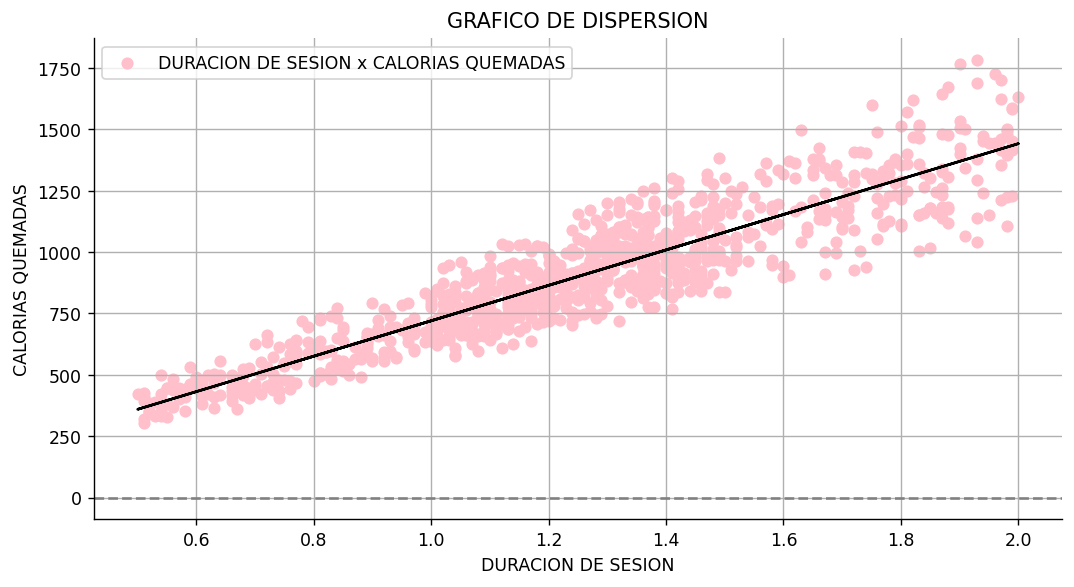

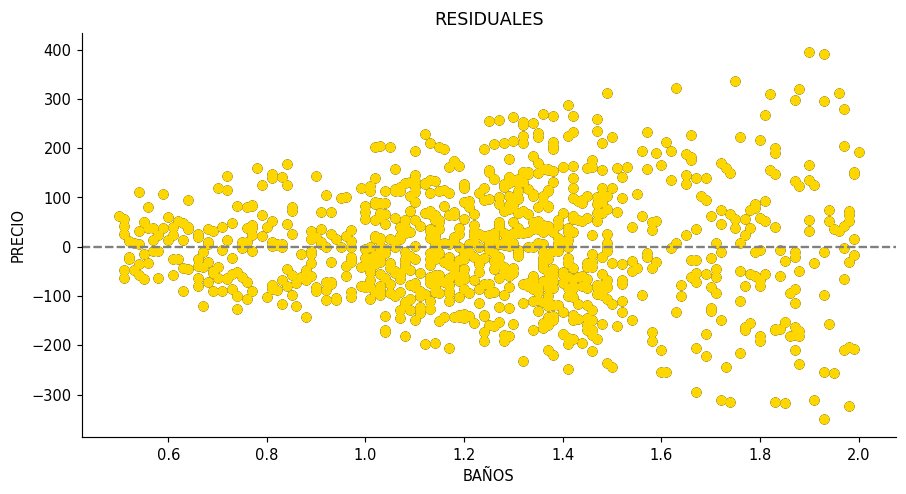

In [56]:
x=df["Session_Duration"]
y=df["Calories_Burned"]
df.head(10)
print(df)
print("\n")

#REALIZAR UN DIAGRAMA DE DISPERSION PARA LOS DATOS
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5),dpi=125)
plt.scatter(x,y,
    label="DURACION DE SESION x CALORIAS QUEMADAS",
    color="PINK")
plt.title("GRAFICO DE DISPERSION")
plt.xlabel("DURACION DE SESION")
plt.ylabel("CALORIAS QUEMADAS")
plt.axhline(y=0, color="grey", linestyle="--")
plt.legend()
plt.grid()
df.head()
plt.gca().spines[["top","right"]].set_visible(False)

#3.- LOS DATOS SOPORTAN LA SUPOSICION DE LIENALIDAD
#NO

#4.- CALCULAR EL COEFICIENTE DE CORRELACION
from scipy.stats import pearsonr
r,_=pearsonr(x,y)
print( f"COEFICIENTE DE CORRELACION: {r: 0.4f}\n")

#6.- OBTENGA LA RECTA DE REGRESION AJUSTADA Y GRAFICAR SOBRE EL GRAFICO DE
#DISPERSION
import statsmodels.api as sm
x_constante=sm.add_constant(x)
modelo=sm.OLS(y,x_constante).fit()
yc=modelo.predict(x_constante)
plt.plot(x,yc, color="BLACK")

#5.- CALCULE EL COEFICIENTE DE DETERMINACION E INTERPRETE EL RESULTADO
from sklearn.metrics import r2_score
r2=r2_score(y,yc)
print( f"COEFICIENTE DE DETERMINACION: {r2: 0.4f} \n")

#7.-OBTENGA UN INTERVALO DE CONFIANZA DEL 95% PARA LA PENDIENTE DE LA RECTA DE
nivel_confianza= 0.95
intervalo_de_confianza=modelo.conf_int(alpha= 1 - nivel_confianza)
intervalo_de_confianza_b1=intervalo_de_confianza.iloc[1]
print(f"INTERVALO DE CONFIANZA DEL PARA b1 ES: {nivel_confianza:0.0%} \n")
print(f"{intervalo_de_confianza_b1[0]: 0.4f} < b1 < {intervalo_de_confianza_b1[1]: 0.4f} \n")

#8.- CALCULE LOS RESIDUALES Y TRACE UN NUEVO GRAFICO DE DISPERSION. COMENTE,
# PARECE QUE SE VERIFICAN LOS SUPUESTOS
residuales= modelo.resid
plt.figure(figsize=(10,5),dpi=105)
plt.scatter(x,residuales, color="Black")
plt.title("RESIDUALES")
plt.xlabel("BAÑOS")
plt.ylabel("PRECIO")
plt.axhline(y=0, color="grey", linestyle="--")
plt.scatter(x, residuales,
            label="BAÑOS",
            color="gold")
plt.axhline(y=0, color="grey", linestyle="--")
plt.gca().spines[["top","right"]].set_visible(False)

#9.- REALIZAR LA PRUEBA DE SHAPIRO PARA LOS RESIDUALES Y COMENTE EL RESULTADO
from scipy.stats import shapiro
estadistico_shapiro, valor_p_sh = shapiro(residuales)
print("valor_p_sh:", valor_p_sh )
print("\n")
if valor_p_sh<0.05:
  print("Los datos no siguen una distribucion normal")
else:
  print("Los datos siguen una distribucion normal \n")

#10.-REALIZAR LA PRUEBA DE BREUSCHPAGAN PARA LOS RESIDUALES Y COMENTE LOS RESULTADOS
from statsmodels.stats.api import het_breuschpagan
_, valor_p_bp, _, _ = het_breuschpagan(residuales, x_constante)
print("valor_p_bp:", valor_p_bp)
print("\n")
if valor_p_bp<0.05:
  print("Hay heteroscedasticidad")
else:
  print("Hay homosedasticidad \n")

#11.- UTILIZA LA RECTA DE REGRESION PARA INTERPOLAR DOS VALORES Y EXTRAPOLAR UNO
#COMENTA LOS RESULTADOS
print(f"Para x = 0.5, y = {modelo.predict([1,5])[0]}")
print(f"Para x = 1.5, y = {modelo.predict([1,8])[0]}")
print(f"Para x = 2, y = {modelo.predict([1,20])[0]}\n")\

#12.- REALIZAR TABLA ANOVA E INTERPRETAR EL RESULTADO
from statsmodels.formula.api import ols
modelo_lineal=ols(" Calories_Burned ~ Session_Duration", data=df).fit()
tabla_anova=sm.stats.anova_lm(modelo_lineal)
if valor_p_bp<0.05:
  print("No hay relacion entre X y Y")
else:
  print("Si hay relacion entre X y Y")
tabla_anova
#No soporta la supocision de linealidad
#Normalidad en los residuales
#Relacion fuerte entre "x" y "y"
#Homosedasticidad
#confiable
#solo por interpolacion